In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

$\mathbf{X}$ is a feature matrix corresponding to $n$ training examples, each represented with $d$ features and has shape $d \times n$.  
\begin{equation}
  \mathbf{X}_{d \times n} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

* here each $\mathbf{x}_i \in \mathbb{R}^d$

*  $\mathbf{y}$ is a label vector of shape $n \times 1$.  
\begin{equation}
    \mathbf{y} = \begin{bmatrix}
        y_{1}  \\
        y_{2} \\
        \vdots  \\
        y_{n} \\
      \end{bmatrix}
\end{equation}

*  The $i$-th entry in this vector, $\mathbf{y}[i]$ gives label for $i$-th example, which is denoted by $y_{i} \in \mathbb{R}$.

### Training data

In [2]:
## Training Data
rng = np.random.default_rng(seed = 101)
X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))
y_train = (2*X_train**3+3*X_train**2 +4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T


## Plotting the dataset

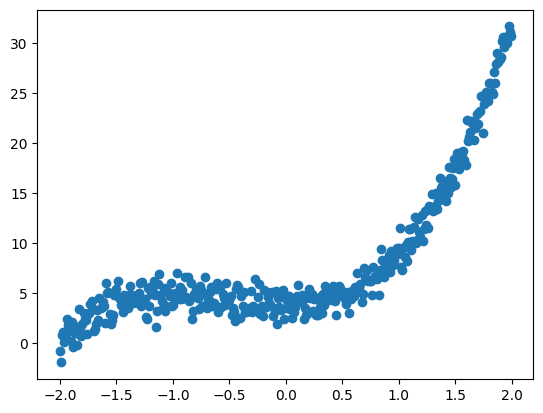

In [3]:
plt.scatter(X_train, y_train)

### Test data

In [4]:
### Test data
rng = np.random.default_rng(seed = 102)
X_test = np.arange(-2, 2, 0.02).reshape(1, -1)
y_test = (2*X_test**3+3*X_test**2 +4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

## Plotting the dataset

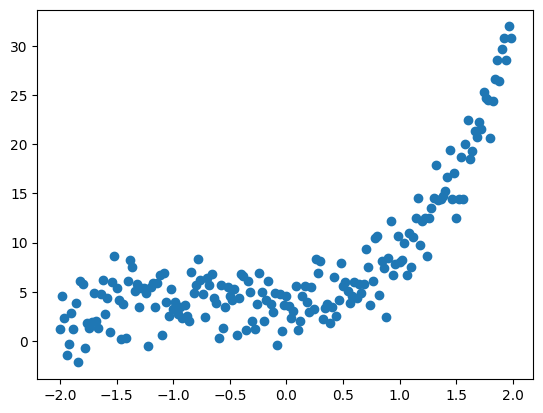

In [5]:
plt.scatter(X_test, y_test)

## Model

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbf{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature of the data point $\mathbf{x}$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbf{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbf{X}$ is of shape $(d+1, n)$ where the first row of $\mathbf{X}$ has entries as 1.


### Add dummy feature

In [6]:
dummy_features = np.ones(X_train.shape[1])
X = np.row_stack((dummy_features, X_train))
X.shape

(2, 400)

In [7]:
X_t = np.row_stack((np.ones(X_test.shape[1]), X_test))
X_t.shape

(2, 200)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}



The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)}
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right))
\end{eqnarray}


## Optimization



#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X}^T \mathbf{Y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



#### Find weight vector and prediction for training and test dataset

In [8]:
### weight

def weights(X, y):
  return (np.linalg.pinv(X @ X.T) @ (X @ y))

w = weights(X, y_train)

In [9]:
### Prediction

def prediction(X, w):
  return X.T @ w

y_pred = prediction(X, w)
y_pred

array([[-1.65837656],
       [-1.61038554],
       [-1.56239452],
       [-1.51440349],
       [-1.46641247],
       [-1.41842144],
       [-1.37043042],
       [-1.3224394 ],
       [-1.27444837],
       [-1.22645735],
       [-1.17846632],
       [-1.1304753 ],
       [-1.08248428],
       [-1.03449325],
       [-0.98650223],
       [-0.9385112 ],
       [-0.89052018],
       [-0.84252916],
       [-0.79453813],
       [-0.74654711],
       [-0.69855608],
       [-0.65056506],
       [-0.60257403],
       [-0.55458301],
       [-0.50659199],
       [-0.45860096],
       [-0.41060994],
       [-0.36261891],
       [-0.31462789],
       [-0.26663687],
       [-0.21864584],
       [-0.17065482],
       [-0.12266379],
       [-0.07467277],
       [-0.02668175],
       [ 0.02130928],
       [ 0.0693003 ],
       [ 0.11729133],
       [ 0.16528235],
       [ 0.21327337],
       [ 0.2612644 ],
       [ 0.30925542],
       [ 0.35724645],
       [ 0.40523747],
       [ 0.45322849],
       [ 0

In [10]:
yt_pred = prediction(X_t, w)
yt_pred

array([[-1.65837656],
       [-1.56239452],
       [-1.46641247],
       [-1.37043042],
       [-1.27444837],
       [-1.17846632],
       [-1.08248428],
       [-0.98650223],
       [-0.89052018],
       [-0.79453813],
       [-0.69855608],
       [-0.60257403],
       [-0.50659199],
       [-0.41060994],
       [-0.31462789],
       [-0.21864584],
       [-0.12266379],
       [-0.02668175],
       [ 0.0693003 ],
       [ 0.16528235],
       [ 0.2612644 ],
       [ 0.35724645],
       [ 0.45322849],
       [ 0.54921054],
       [ 0.64519259],
       [ 0.74117464],
       [ 0.83715669],
       [ 0.93313874],
       [ 1.02912078],
       [ 1.12510283],
       [ 1.22108488],
       [ 1.31706693],
       [ 1.41304898],
       [ 1.50903102],
       [ 1.60501307],
       [ 1.70099512],
       [ 1.79697717],
       [ 1.89295922],
       [ 1.98894127],
       [ 2.08492331],
       [ 2.18090536],
       [ 2.27688741],
       [ 2.37286946],
       [ 2.46885151],
       [ 2.56483355],
       [ 2

### Plot weight vector

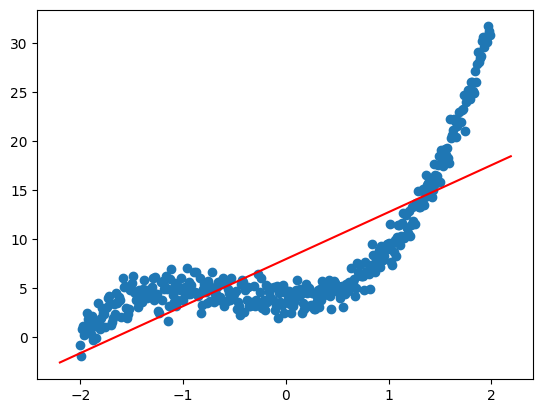

In [11]:
### Plot weight vector

plt.scatter(X_train, y_train)
axes = plt.gca()
x = np.array(axes.get_xlim())
y = w[1]*x + w[0]

plt.plot(x, y, color='r')

## Evaluation

##### RMSE $$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$



In [12]:
### Training error and test error

def rmse_loss(y, y_hat):
  return np.sqrt(np.mean((y-y_hat)**2))

In [13]:
train_error = rmse_loss(y_train, y_pred)
train_error

4.477002001803876

In [14]:
test_error = rmse_loss(y_test, yt_pred)
test_error

4.718639896481514

#### 2. Gradient Descent


Gradient of a function $f$ at a point $x$ gives the direction of maximum change in $f$ at the point $x$.

---

We start at a random point $\mathbf{w}$ at the loss function $L(\mathbf{w})$.


We basically need an update rule in gradient descent, which is as follows:

\begin{eqnarray}
\mathbf{w}_{k+1} &:=& \mathbf{w}_k - \alpha{\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}}} \\
   &:=& \mathbf{w}_k - \alpha{\left(\mathbf{X} \mathbf{X}^T \mathbf{w}_{k} - \mathbf{X} \mathbf{y}\right)} \\
\end{eqnarray}

Note that this is the vectorized implementation.  It will make sure that all the parameters are updated in one go through this.


In [15]:
### Gradient descent

def gradient(X, y, w):
  return X@X.T@w - X@y

In [16]:
def gradient_descent(X, y, eta, n_iter):
  w0 = np.zeros(X.shape[0]).reshape(X.shape[0], 1)

  for i in range(n_iter):
    w0 = w0 - eta*(gradient(X, y, w0))

  return w0

In [17]:
W_gd = gradient_descent(X, y_train, 0.001, 20)
W_gd

array([[7.93953512],
       [4.79909689]])

In [18]:
y_pred_gd = prediction(X, W_gd)
y_pred_gd

array([[-1.65865866],
       [-1.6106677 ],
       [-1.56267673],
       [-1.51468576],
       [-1.46669479],
       [-1.41870382],
       [-1.37071285],
       [-1.32272188],
       [-1.27473091],
       [-1.22673994],
       [-1.17874898],
       [-1.13075801],
       [-1.08276704],
       [-1.03477607],
       [-0.9867851 ],
       [-0.93879413],
       [-0.89080316],
       [-0.84281219],
       [-0.79482122],
       [-0.74683026],
       [-0.69883929],
       [-0.65084832],
       [-0.60285735],
       [-0.55486638],
       [-0.50687541],
       [-0.45888444],
       [-0.41089347],
       [-0.3629025 ],
       [-0.31491154],
       [-0.26692057],
       [-0.2189296 ],
       [-0.17093863],
       [-0.12294766],
       [-0.07495669],
       [-0.02696572],
       [ 0.02102525],
       [ 0.06901622],
       [ 0.11700718],
       [ 0.16499815],
       [ 0.21298912],
       [ 0.26098009],
       [ 0.30897106],
       [ 0.35696203],
       [ 0.404953  ],
       [ 0.45294397],
       [ 0

In [19]:
yt_pred_gd = prediction(X_t, W_gd)
yt_pred_gd

array([[-1.65865866],
       [-1.56267673],
       [-1.46669479],
       [-1.37071285],
       [-1.27473091],
       [-1.17874898],
       [-1.08276704],
       [-0.9867851 ],
       [-0.89080316],
       [-0.79482122],
       [-0.69883929],
       [-0.60285735],
       [-0.50687541],
       [-0.41089347],
       [-0.31491154],
       [-0.2189296 ],
       [-0.12294766],
       [-0.02696572],
       [ 0.06901622],
       [ 0.16499815],
       [ 0.26098009],
       [ 0.35696203],
       [ 0.45294397],
       [ 0.54892591],
       [ 0.64490784],
       [ 0.74088978],
       [ 0.83687172],
       [ 0.93285366],
       [ 1.02883559],
       [ 1.12481753],
       [ 1.22079947],
       [ 1.31678141],
       [ 1.41276335],
       [ 1.50874528],
       [ 1.60472722],
       [ 1.70070916],
       [ 1.7966911 ],
       [ 1.89267303],
       [ 1.98865497],
       [ 2.08463691],
       [ 2.18061885],
       [ 2.27660079],
       [ 2.37258272],
       [ 2.46856466],
       [ 2.5645466 ],
       [ 2

In [20]:
train_loss_gd = rmse_loss(y_train, y_pred_gd)
train_loss_gd

4.4770020114031635

In [21]:
test_loss_gd = rmse_loss(y_test, yt_pred_gd)
test_loss_gd

4.718632987913552

### Number of iterations vs loss (for fixed alpha)

In [22]:
### Plot nunber of iterations vs loss

niters = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000]
loss_list = []

for iters in niters:
  W_gd = gradient_descent(X, y_train, 0.001, iters)
  y_train_pred = prediction(X, W_gd)
  loss = rmse_loss(y_train, y_train_pred)
  loss_list.append(loss)

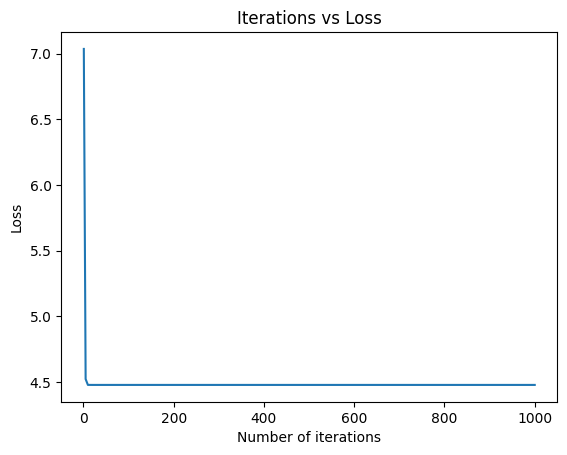

In [23]:
plt.plot(niters, loss_list)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show();

###9 SGD:



In [24]:
### SGD

def SGD(X, y, eta, sample_size, n_steps, n_iters):
  for step in range(n_steps):
    rng = np.random.default_rng(seed = step)
    indices = rng.integers(0, X.shape[1], size = sample_size)
    X1 = X[:, indices]
    y1 = y[indices]
    w0 = np.zeros(X.shape[0])
    for iter in range(n_iters):
      w0 = w0- eta*(gradient(X1, y1, w0))
    if step==0:
      w_list = w0
    else:
      w_list = np.column_stack((w_list, w0))
  return np.mean(w_list, axis=1)

In [25]:
w_sgd = SGD(X, y_train, 0.01, 30, 50, 7)
w_sgd

array([7.17276318, 4.65916691])

In [26]:
y_pred_sgd = prediction(X, W_gd)
y_pred_sgd

array([[-1.65837656],
       [-1.61038554],
       [-1.56239452],
       [-1.51440349],
       [-1.46641247],
       [-1.41842144],
       [-1.37043042],
       [-1.3224394 ],
       [-1.27444837],
       [-1.22645735],
       [-1.17846632],
       [-1.1304753 ],
       [-1.08248428],
       [-1.03449325],
       [-0.98650223],
       [-0.9385112 ],
       [-0.89052018],
       [-0.84252916],
       [-0.79453813],
       [-0.74654711],
       [-0.69855608],
       [-0.65056506],
       [-0.60257403],
       [-0.55458301],
       [-0.50659199],
       [-0.45860096],
       [-0.41060994],
       [-0.36261891],
       [-0.31462789],
       [-0.26663687],
       [-0.21864584],
       [-0.17065482],
       [-0.12266379],
       [-0.07467277],
       [-0.02668175],
       [ 0.02130928],
       [ 0.0693003 ],
       [ 0.11729133],
       [ 0.16528235],
       [ 0.21327337],
       [ 0.2612644 ],
       [ 0.30925542],
       [ 0.35724645],
       [ 0.40523747],
       [ 0.45322849],
       [ 0

In [27]:
yt_pred_sgd = prediction(X_t, W_gd)
yt_pred_sgd

array([[-1.65837656],
       [-1.56239452],
       [-1.46641247],
       [-1.37043042],
       [-1.27444837],
       [-1.17846632],
       [-1.08248428],
       [-0.98650223],
       [-0.89052018],
       [-0.79453813],
       [-0.69855608],
       [-0.60257403],
       [-0.50659199],
       [-0.41060994],
       [-0.31462789],
       [-0.21864584],
       [-0.12266379],
       [-0.02668175],
       [ 0.0693003 ],
       [ 0.16528235],
       [ 0.2612644 ],
       [ 0.35724645],
       [ 0.45322849],
       [ 0.54921054],
       [ 0.64519259],
       [ 0.74117464],
       [ 0.83715669],
       [ 0.93313874],
       [ 1.02912078],
       [ 1.12510283],
       [ 1.22108488],
       [ 1.31706693],
       [ 1.41304898],
       [ 1.50903102],
       [ 1.60501307],
       [ 1.70099512],
       [ 1.79697717],
       [ 1.89295922],
       [ 1.98894127],
       [ 2.08492331],
       [ 2.18090536],
       [ 2.27688741],
       [ 2.37286946],
       [ 2.46885151],
       [ 2.56483355],
       [ 2

In [28]:
train_loss_sgd = rmse_loss(y_pred_sgd, y_train)
train_loss_sgd

4.477002001803876

In [29]:
test_loss_sgd = rmse_loss(yt_pred_sgd, y_test)
test_loss_sgd

4.718639896481514

## Kernel Regression



* The optimal weight vector can be written as linear combination of data points.

---

Let $\phi$ be the trainsformation mapping that trasforms the $d$-dimensional data points to $D$-dimension.

$$\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D$$

Then

$$\mathbf{w} = \phi(\mathbf{X})\alpha$$

where,

* $\mathbf{X}$ = Feature matrix of shape $(d, n)$
* $\alpha = [\alpha_1, \alpha_2, ..., \alpha_n]^T \in \mathbb{R}^n$



Here

$$\alpha = K^{-1}y$$

where,
\begin{equation}
 K_{n \times n} = \begin{bmatrix}
       k(\mathbf{x}_1,\mathbf{x}_1) & k(\mathbf{x}_1,\mathbf{x}_2) &\dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
        k(\mathbf{x}_2,\mathbf{x}_1) & k(\mathbf{x}_2,\mathbf{x}_2) &\dots & k(\mathbf{x}_2,\mathbf{x}_n)\\
        \vdots & \vdots & \dots & \vdots\\
       k(\mathbf{x}_n,\mathbf{x}_1) & k(\mathbf{x}_n,\mathbf{x}_2) &\dots & k(\mathbf{x}_n,\mathbf{x}_n)\\
    \end{bmatrix}
\end{equation}

Here, $k$ is the kernel function

$$k: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}\\ k(x_1, x_2) = \phi(x_1)^T\phi(x_2)
$$

## Prediction

For a test point $\mathbf{x}_t$, prediction is given by

$$\sum\limits_{i=1}^{n}k(\mathbf{x}_i, \mathbf{x}_t)\alpha_i$$



#### Polynomial kernel of degree $p$:


$k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T\mathbf{x}_2+1)^p$

\begin{equation}
  \mathbf{X} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

\begin{equation}
  \mathbf{X^TX} =\begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}^T\begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
    =  \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{1} &  \mathbf{x}_1^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{m} \\
      \mathbf{x}_2^T\mathbf{x}_{1} &  \mathbf{x}_2^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{m} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{1} &  \mathbf{x}_n^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{m} \\
    \end{bmatrix}
\end{equation}


In [30]:
### Polynomial Kernel

def poly_kernel(X, p):
  return ((X.T @ X) + 1)**p

In [31]:
### Coefficient alpha

def coeff_alpha(X, y, p):
  K = poly_kernel(X, p)
  return np.linalg.pinv(K) @ y

In [32]:
### Prediction

alpha = coeff_alpha(X, y_train, 3)
alpha.shape

(400, 1)

#### For prediction

Let the training data matrix with $n$ examples is given by
 \begin{equation}
  \mathbf{X}_{train} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

and the test data matrix with $m$ examples is given by
 \begin{equation}
  \mathbf{X}_{test} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{t1}&  
       \mathbf{x}_{t2} &
      \dots &
       \mathbf{x}_{tm}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

----

Then

\begin{equation}
  \mathbf{X}_{train}^T \mathbf{X}_{test}  = \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{t1} &  \mathbf{x}_1^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{tm} \\
      \mathbf{x}_2^T\mathbf{x}_{t1} &  \mathbf{x}_2^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{tm} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{t1} &  \mathbf{x}_n^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{tm} \\
    \end{bmatrix}
\end{equation}


In [33]:
### Prediction

def kernel_prediction(X_train, y_train, X_test, p):
  alpha = coeff_alpha(X_train, y_train, p)
  return ((X_train.T @ X_test + 1)**p).T @ alpha

In [34]:
yhat_k = kernel_prediction(X, y_train, X, 3)

In [35]:
kernel_loss = rmse_loss(yhat_k, y_train)
kernel_loss

1.0061212525621972

In [36]:
yhat_test_k = kernel_prediction(X_t, y_test, X_t, 3)

In [37]:
test_kernel_loss =  rmse_loss(yhat_test_k, y_test)
test_kernel_loss

2.088693401944381

### degree vs loss

In [38]:
### Plot degree vs loss

degree = list(range(1, 16))
train_loss_list = []
test_loss_list = []

for p in degree:
  y_pred_train = kernel_prediction(X, y_train, X, p)
  train_kernel_loss =  rmse_loss(y_pred_train, y_train)
  train_loss_list.append(train_kernel_loss)

  y_pred_test = kernel_prediction(X_t, y_test, X_t, p)
  test_kernel_loss =  rmse_loss(y_pred_test, y_test)
  test_loss_list.append(test_kernel_loss)

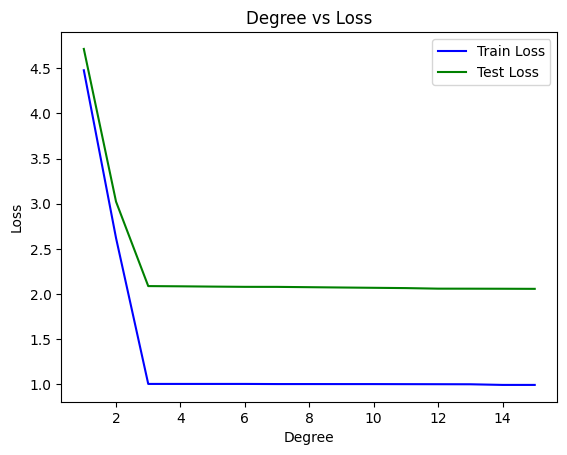

In [39]:
plt.plot(degree, train_loss_list, label="Train Loss", color = 'b')
plt.plot(degree, test_loss_list, label="Test Loss", color= 'g')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Loss")
plt.title("Degree vs Loss")
plt.show();